# Import Packages

In [2]:

import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [3]:
class_names = ['glaucoma',"normal","cataract","diabetic_retinopathy",]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [7]:
def load_data():

    datasets = [r"C:\Users\SRIRA\Downloads\Opthalmic Diagnosis\Opthalmic Diagnosis\train", r'C:\Users\SRIRA\Downloads\Opthalmic Diagnosis\Opthalmic Diagnosis\test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [9]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\SRIRA\Downloads\Opthalmic Diagnosis\Opthalmic Diagnosis\train


100%|██████████| 1074/1074 [00:08<00:00, 127.58it/s]


Loading C:\Users\SRIRA\Downloads\Opthalmic Diagnosis\Opthalmic Diagnosis\test


100%|██████████| 99/99 [00:00<00:00, 140.62it/s]


In [11]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [13]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 4217
Number of testing examples: 333
Each image is of size: (64, 64)


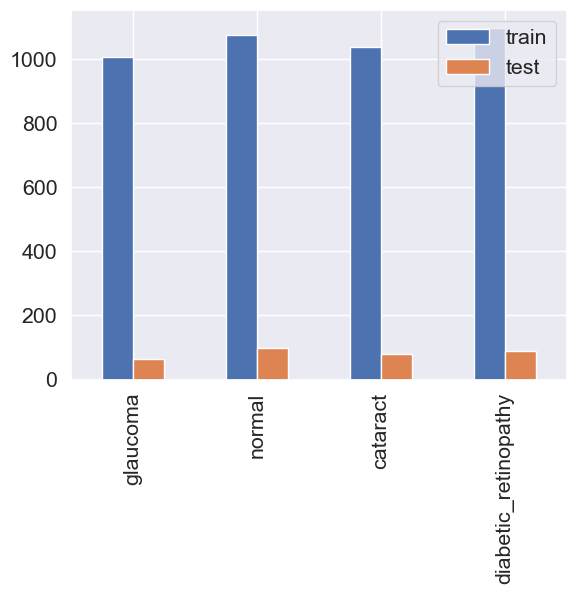

In [15]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

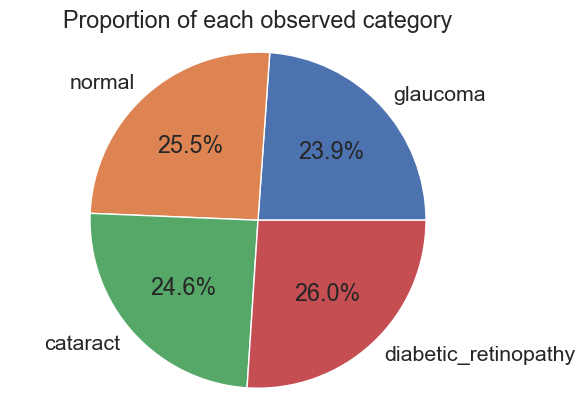

In [17]:
plt.pie(train_counts,
        explode=(0,0,0,0,) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Good practice: scale the data

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [23]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

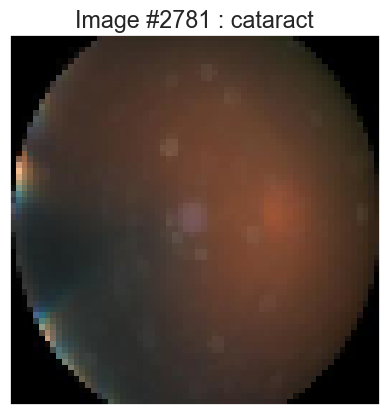

In [25]:
display_random_image(class_names, train_images, train_labels)

In [27]:
import matplotlib.pyplot as plt

def display_examples(class_names, images, labels):
    """
    Display 25 images from the images array with its corresponding labels
    """
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()


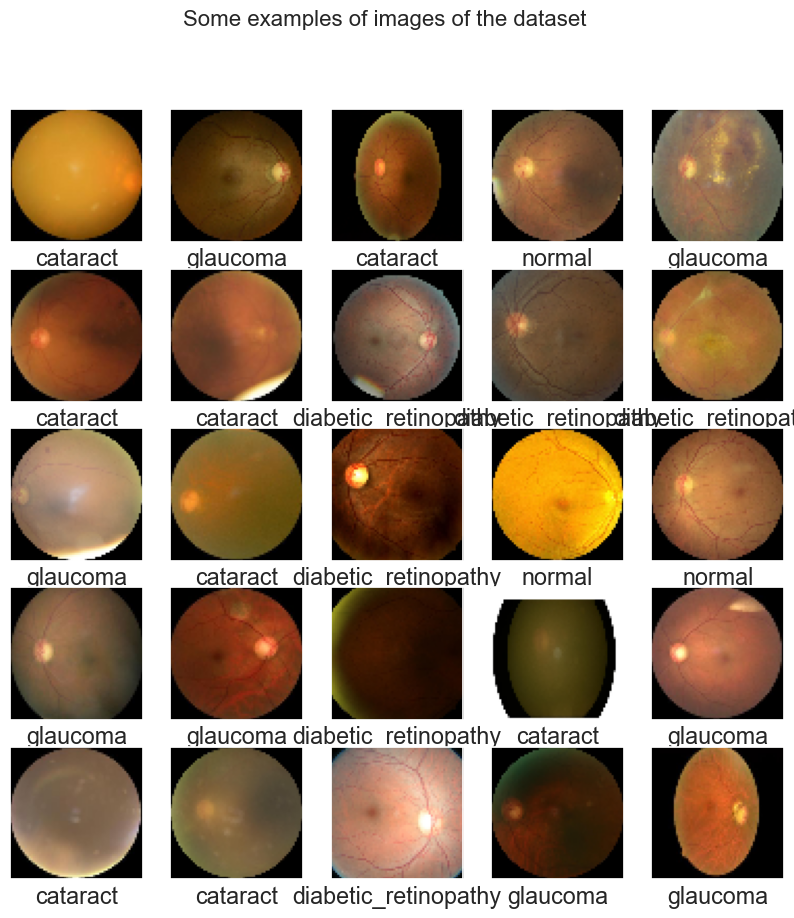

In [29]:
display_examples(class_names, train_images, train_labels)

# CNN

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

C:\Users\SRIRA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2)

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 592ms/step - accuracy: 0.3660 - loss: 1.4747 - val_accuracy: 0.5900 - val_loss: 0.9787
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 545ms/step - accuracy: 0.6055 - loss: 0.9067 - val_accuracy: 0.5036 - val_loss: 0.9800
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 566ms/step - accuracy: 0.6425 - loss: 0.8055 - val_accuracy: 0.7109 - val_loss: 0.7015
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 533ms/step - accuracy: 0.7062 - loss: 0.6953 - val_accuracy: 0.7204 - val_loss: 0.6408
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 553ms/step - accuracy: 0.7391 - loss: 0.6419 - val_accuracy: 0.7737 - val_loss: 0.5751
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 551ms/step - accuracy: 0.7653 - loss: 0.5954 - val_accuracy: 0.7855 - val_loss: 0.5287
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 23s 629ms/step - accuracy: 0.8009 - loss: 0.4997 - val_accuracy: 0.7334 - val_loss: 0.6337
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 498ms/step - accuracy: 0.7801 - loss: 0.5237 - val_accu

In [42]:
test_loss = model.evaluate(test_images, test_labels)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8956 - loss: 0.2050


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


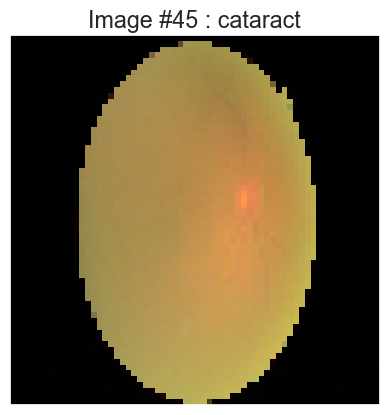

In [44]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

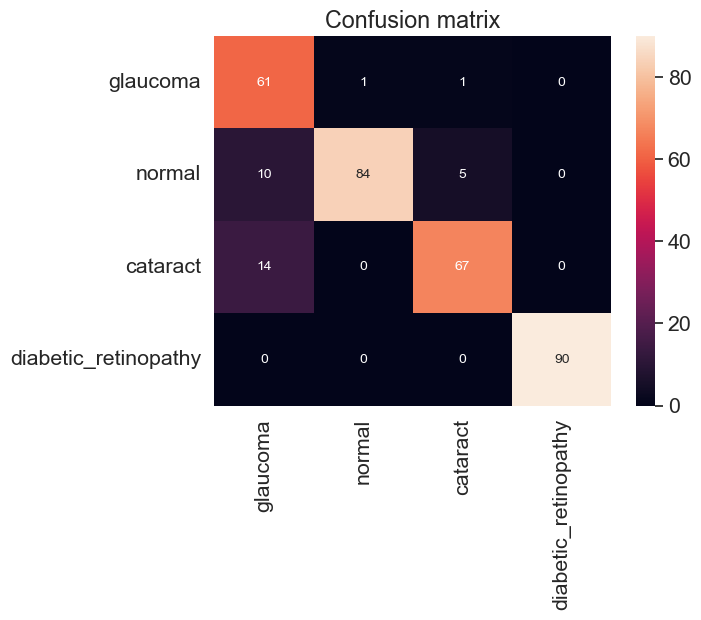

In [46]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [48]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming CM is your confusion matrix, and you have class_names defined

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(test_labels, pred_labels, average='weighted')
overall_recall = recall_score(test_labels, pred_labels, average='weighted')
overall_f1 = f1_score(test_labels, pred_labels, average='weighted')

# Calculate custom accuracy
custom_accuracy = accuracy_score(test_labels, pred_labels)

print(f'Precision: {overall_precision}')
print(f'Recall: {overall_recall}')
print(f'F1 Score: {overall_f1}')
print(f'Custom Accuracy: {custom_accuracy}')

Precision: 0.9230916653962585
Recall: 0.9069069069069069
F1 Score: 0.9093220908732073
Custom Accuracy: 0.9069069069069069


In [50]:
# Generate and print classification report
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels, target_names=class_names))


Classification Report:
                      precision    recall  f1-score   support

            glaucoma       0.72      0.97      0.82        63
              normal       0.99      0.85      0.91        99
            cataract       0.92      0.83      0.87        81
diabetic_retinopathy       1.00      1.00      1.00        90

            accuracy                           0.91       333
           macro avg       0.91      0.91      0.90       333
        weighted avg       0.92      0.91      0.91       333



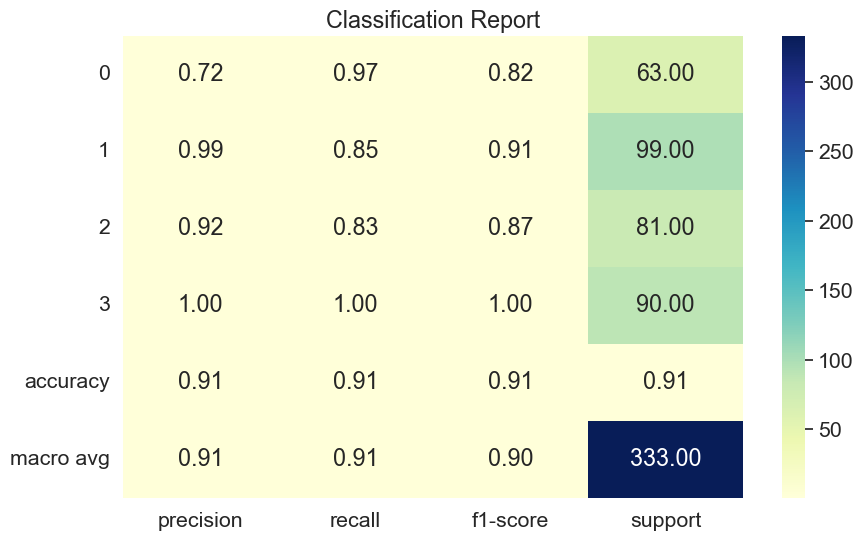

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming test_labels and pred_labels are available

# Generate classification report
report = classification_report(test_labels, pred_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()

In [54]:
model.save_weights("model_dense.weights.h5")
print("Saved model to disk")

Saved model to disk


In [56]:
model_json=model.to_json()
with open("model_dense.json", "w") as json_file:
    json_file.write(model_json)

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model_dense.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights("model_vgg.h5")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify(model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = ['glaucoma',"normal","cataract","diabetic_retinopathy"]
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("home.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [01/Mar/2025 17:02:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2025 17:02:07] "GET /static/script.js HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2025 17:02:07] "GET /static/images/download.jpeg HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2025 17:02:07] "GET /static/images/diabetic.jpg HTTP/1.1" 404 -
127.0.0.1 - - [01/Mar/2025 17:02:09] "GET /favicon.ico HTTP/1.1" 404 -


uploads\100_left.jpeg


[2025-03-01 17:02:37,616] ERROR in app: Exception on /classify [POST]
Traceback (most recent call last):
  File "C:\Users\SRIRA\AppData\Roaming\Python\Python312\site-packages\flask\app.py", line 1511, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SRIRA\AppData\Roaming\Python\Python312\site-packages\flask\app.py", line 919, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SRIRA\AppData\Roaming\Python\Python312\site-packages\flask\app.py", line 917, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SRIRA\AppData\Roaming\Python\Python312\site-packages\flask\app.py", line 902, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\User